In [235]:
# GOTO 2018 - Machine Learning: Alchemy for the Modern Computer Scientist
# https://www.youtube.com/watch?v=Rs0uRQJdIcg

import jax
import matplotlib.pyplot as plt
import time
import math

In [236]:
class Dual:
    """
    Notes: https://www.geeksforgeeks.org/operator-overloading-in-python/
    """
    def __init__(self, real: float = 0.0, dual: float = 1.0) -> None:
        if isinstance(real, Dual):
            self.real = real.real
            self.dual = real.dual
        else:
            self.real = real
            self.dual = dual

    def __add__(self, other) -> Dual:
        other = Dual(other, 0)
        return Dual(self.real + other.real, self.dual + other.dual)
    __radd__ = __add__

    def __sub__(self, other) -> Dual:
        other = Dual(other, 0)
        return Dual(self.real - other.real, self.dual - other.dual)

    def __rsub__(self, other) -> Dual:
        other = Dual(other, 0)
        return other - self

    def __mul__(self, other) -> Dual:
        other = Dual(other, 0)
        return Dual(self.real * other.real, self.real * other.dual + self.dual * other.real)
    __rmul__ = __mul__

    def __truediv__(self, other) -> Dual:
        other = Dual(other, 0)
        return Dual(self.real / other.real,
                    (self.dual * other.real - self.real * other.dual) / (other.real ** 2))

    def __rtruediv__(self, other) -> Dual:
        other = Dual(other, 0)
        return other.__truediv__(self)

    def __pow__(self, other) -> Dual:
        other = Dual(other, 0)
        return Dual(self.real ** other,
                    self.dual * other * self.real ** (other - 1))

    def __repr__(self) -> str:
        return repr(self.real) + ' + ' + repr(self.dual) + ' * ε'

def diff(f, x) -> float:
    """
    f(a + b * ε) = f(a) + f'(a) * b * ε
    """
    return f(Dual(x, 1.)).dual
    
def sin(x: Dual) -> Dual:
    return Dual(
        real=math.sin(x.real),
        dual=x.dual * math.cos(x.real)
    )

def cos(x: Dual) -> Dual:
    return Dual(
        real=math.cos(x.real),
        dual=-x.dual * math.sin(x.real)
    )

In [216]:
x = Dual(2)

In [217]:
def f(x: Dual):
    return x * x + 2/ x + 3

In [218]:
f(x)

8.0 + 3.5 * ε

In [219]:
jax.grad(f)(2.0)

DeviceArray(3.5, dtype=float32)

In [237]:
def benchmark(n: int, s: int = 1) -> list:
    results = []
    for i in range(0, n, s):
        x = Dual(1)
        start = time.time()
        for j in range(i):
            x = x * x
            
        results.append(time.time() - start)
    return results

In [238]:
results = benchmark(1000)

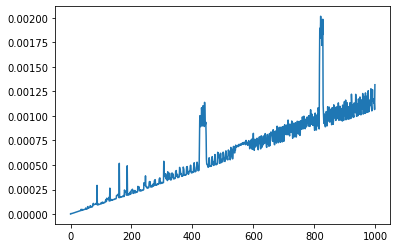

In [239]:
plt.plot(results)